# Principal Component Analysis with Cancer Data

In [459]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [460]:
cancer_df = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [461]:
cancer_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [462]:
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [463]:
cancer_df.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [464]:
cancer_df.isnull().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [465]:
cancer_df.isna().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [466]:
cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [467]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [468]:
cancer_df.loc[~cancer_df['Bare Nuclei'].astype(str).str.isdigit()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [469]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [470]:
cancer_df = cancer_df.replace('?', np.nan)

In [471]:
cancer_df = cancer_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [472]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [473]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [474]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [475]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [476]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64')

In [477]:
cancer_df.loc[~cancer_df['Bare Nuclei'].astype(str).str.isdigit()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [478]:
cancer_df.drop(['ID'], axis=1,inplace=True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [479]:
# Check for correlation of variable

In [480]:
corr=cancer_df.corr()
corr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


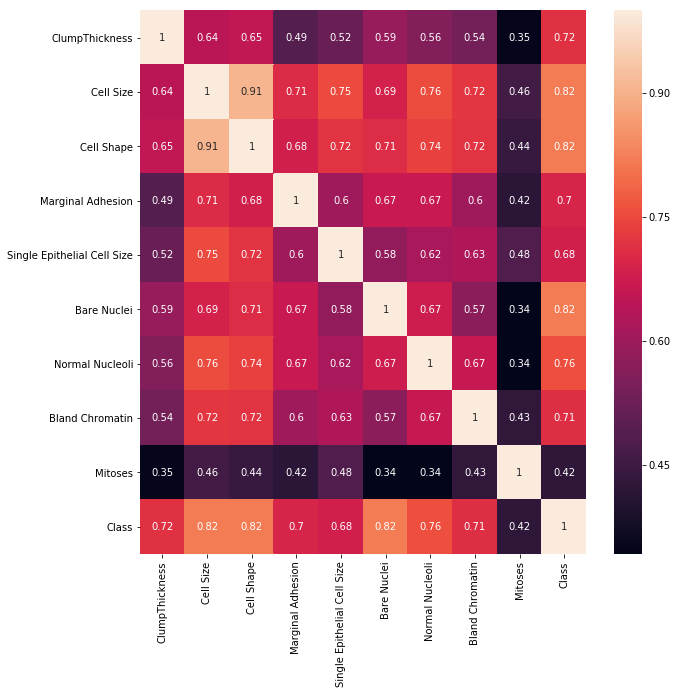

In [481]:
plt.figure(figsize=(10,10))

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

In [482]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [483]:
#Let us check for pair plots

In [484]:
import seaborn as sns
#sns.pairplot(cancer_df, diag_kind='kde')

In [485]:
%matplotlib inline
import seaborn as sns
#sns.pairplot(cancer_df, kind='reg')

In [486]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [487]:
# We could see most of the outliers are now removed.

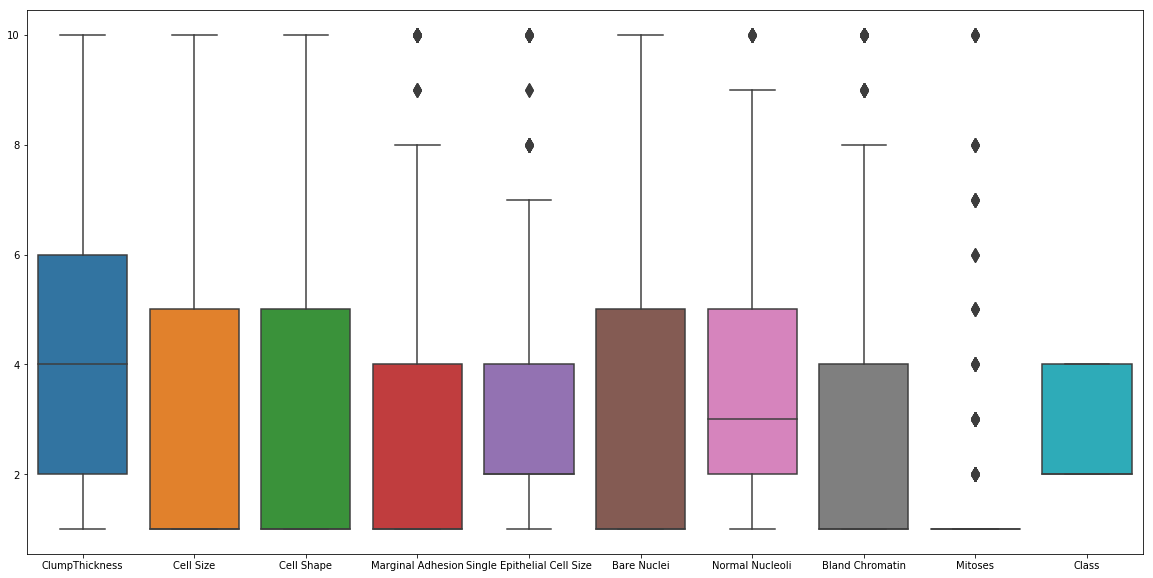

In [488]:
plt.figure(figsize=(20,10))
b = sns.boxplot(data = cancer_df,fliersize=10)

In [489]:
cancer_df.isnull().any()

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [490]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print(f'{fence_low}')
    print(f'{fence_high}')
    cancer_df_new = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return cancer_df_new
cancer_df_new=remove_outlier(cancer_df,'Marginal Adhesion')


-3.5
8.5


In [491]:
cancer_df_new=remove_outlier(cancer_df_new,'Single Epithelial Cell Size')
#cancer_df_new=remove_outlier(cancer_df_new,'Normal Nucleoli')
#cancer_df_new=remove_outlier(cancer_df_new,'Mitoses')

0.5
4.5


In [492]:
cancer_df_new=remove_outlier(cancer_df_new,'Normal Nucleoli')

-2.0
6.0


In [493]:
cancer_df_new['Mitoses'].value_counts()

1     454
2      15
3       6
8       2
7       2
5       2
10      1
4       1
Name: Mitoses, dtype: int64

In [494]:
cancer_df_new.drop(['Mitoses','Class','Cell Shape'], axis=1,inplace=True)

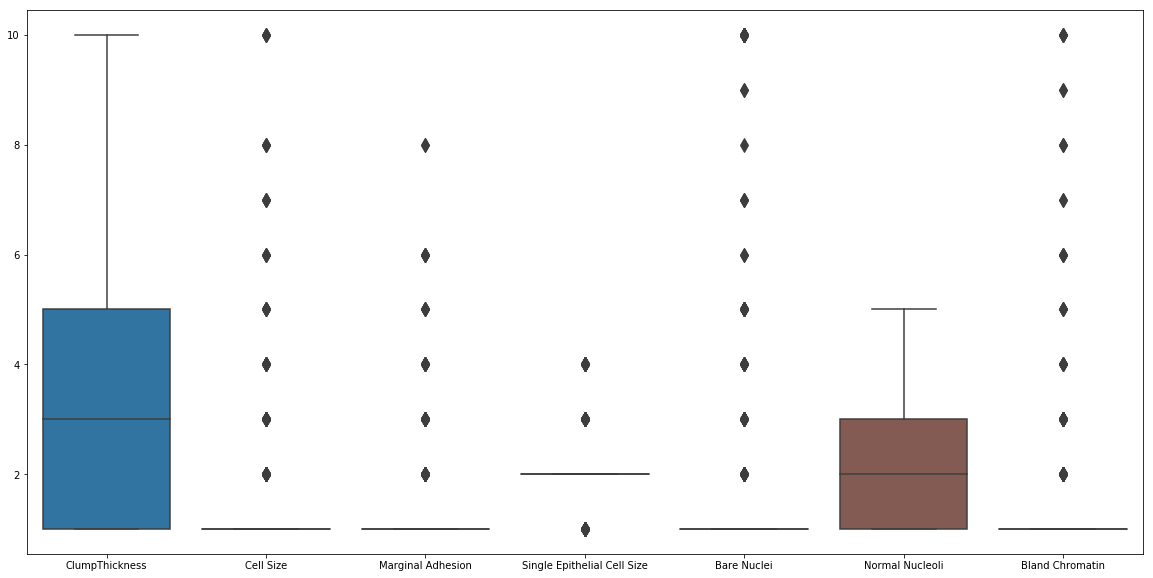

In [495]:
plt.figure(figsize=(20,10))
b = sns.boxplot(data = cancer_df_new,fliersize=10)

In [496]:
from scipy.stats import zscore

cancer_df_new_z = cancer_df_new.apply(zscore)

In [497]:
cancer_df_new_z.head(5)

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.752325,-0.395729,-0.423114,-0.133028,-0.377978,0.887592,-0.326701
2,-0.157244,-0.395729,-0.423114,-0.133028,0.103720,0.887592,-0.326701
3,1.207110,4.487336,-0.423114,1.603528,1.067114,0.887592,3.825843
4,0.297540,-0.395729,1.451784,-0.133028,-0.377978,0.887592,-0.326701
6,-1.066814,-0.395729,-0.423114,-0.133028,3.957298,0.887592,-0.326701


# Q6 Create a covariance matrix for identifying Principal components

In [498]:
# PCA
# Step 1 - Create covariance matrix


In [499]:
cov_matrix=cancer_df_new_z.cov().T
cov_matrix

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
ClumpThickness,1.002075,0.574776,0.386203,0.403412,0.535836,0.342594,0.404325
Cell Size,0.574776,1.002075,0.483447,0.542889,0.690170,0.408514,0.569589
Marginal Adhesion,0.386203,0.483447,1.002075,0.375911,0.536765,0.208372,0.313757
Single Epithelial Cell Size,0.403412,0.542889,0.375911,1.002075,0.475460,0.284998,0.495040
Bare Nuclei,0.535836,0.690170,0.536765,0.475460,1.002075,0.414271,0.497365
Normal Nucleoli,0.342594,0.408514,0.208372,0.284998,0.414271,1.002075,0.395388
Bland Chromatin,0.404325,0.569589,0.313757,0.495040,0.497365,0.395388,1.002075


# Q7 Identify eigen values and eigen vector

In [500]:
# Step 2- Get eigen values and eigen vector

In [501]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.37435925  0.06249544  0.10615648  0.2619364  -0.78948851  0.37041881
  -0.12476942]
 [ 0.44478179  0.04403598 -0.76493184 -0.02510396 -0.11831418 -0.41870655
   0.15863682]
 [ 0.33428451  0.60645535 -0.08861336  0.30572807  0.4941655   0.41807725
  -0.01247653]
 [ 0.36580829  0.06575403  0.09580526 -0.63527575  0.07855285 -0.01571247
  -0.66534904]
 [ 0.43102755  0.12457061  0.60638835  0.19881463  0.05355539 -0.60051007
   0.16728058]
 [ 0.29841331 -0.72489844 -0.04896356  0.43221597  0.31603918  0.10419074
  -0.29245033]
 [ 0.37633391 -0.28468911  0.12835437 -0.45538585  0.09793169  0.37546133
   0.63475346]]

 Eigen Values 
%s [3.72052902 0.83163535 0.29376865 0.6884454  0.58269011 0.40866575
 0.48878852]


# Q8 Find variance and cumulative variance by each eigen vector

In [502]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.04037233  64.89628006  74.71085223  83.01776247  89.98599875
  95.81199374 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

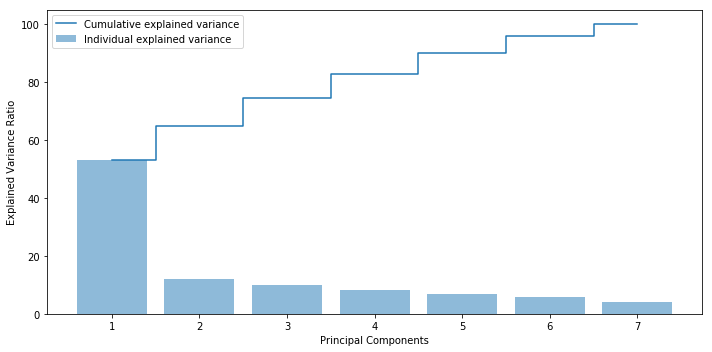

In [503]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [504]:
pca = PCA(n_components=6)
pca.fit(cancer_df_new_z)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

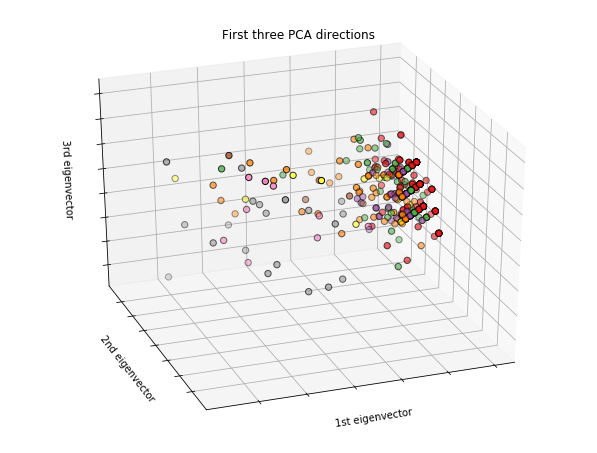

In [505]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(cancer_df_new_z)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=cancer_df_new_z.iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [506]:
pca.components_

array([[ 0.37435925,  0.44478179,  0.33428451,  0.36580829,  0.43102755,
         0.29841331,  0.37633391],
       [ 0.06249544,  0.04403598,  0.60645535,  0.06575403,  0.12457061,
        -0.72489844, -0.28468911],
       [ 0.2619364 , -0.02510396,  0.30572807, -0.63527575,  0.19881463,
         0.43221597, -0.45538585],
       [ 0.78948851,  0.11831418, -0.4941655 , -0.07855285, -0.05355539,
        -0.31603918, -0.09793169],
       [-0.12476942,  0.15863682, -0.01247653, -0.66534904,  0.16728058,
        -0.29245033,  0.63475346],
       [ 0.37041881, -0.41870655,  0.41807725, -0.01571247, -0.60051007,
         0.10419074,  0.37546133]])

In [507]:
pca.explained_variance_

array([3.72052902, 0.83163535, 0.6884454 , 0.58269011, 0.48878852,
       0.40866575])

In [508]:
pca.explained_variance_ratio_

array([0.53040372, 0.11855908, 0.09814572, 0.0830691 , 0.06968236,
       0.05825995])

# Q10 Find correlation between components and features

In [509]:
corr_new=pd.DataFrame(pca.components_).corr()

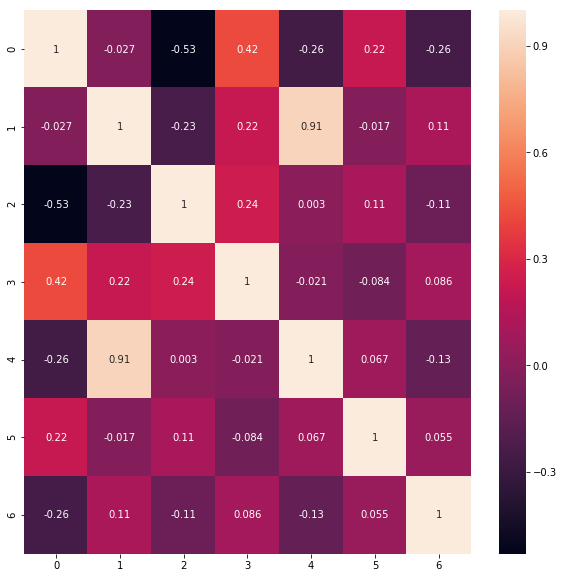

In [510]:
plt.figure(figsize=(10,10))

sns.heatmap(corr_new, 
            xticklabels = corr_new.columns.values,
            yticklabels = corr_new.columns.values,
            annot = True);

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [397]:
jokes_df = pd.read_csv("jokes.csv")

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [398]:
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [399]:
ratings=jokes_df.loc[:200]

In [400]:
ratings.shape

(201, 101)

In [511]:
ratings.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [512]:
ratings.columns = pd.RangeIndex(ratings.columns.size)

In [513]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [514]:
ratings = ratings.replace(99.00, 0)

In [515]:
ratings.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
147,49,0.00,0.00,0.00,0.00,-4.81,0.00,-2.52,-3.59,0.00,...,0.00,0.00,-1.02,0.00,0.00,-3.16,0.00,0.00,0.00,0.00
125,72,-9.51,7.72,-8.54,0.24,-3.45,-7.62,-9.22,3.59,-4.81,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
167,51,0.00,0.00,0.00,0.00,4.51,0.00,0.44,-4.37,0.00,...,0.00,0.00,8.74,0.92,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
131,62,0.24,4.76,0.39,0.00,-1.12,5.19,5.05,-1.07,0.24,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.29,0.00
35,41,-9.66,-8.35,0.00,0.00,0.29,0.00,-9.22,-9.51,0.00,...,0.00,0.00,0.00,1.36,0.00,0.00,0.00,0.00,0.00,0.00
126,36,0.00,0.00,0.00,0.00,-0.63,0.00,-8.88,-3.93,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
165,93,-0.53,-9.37,-0.63,-8.20,1.70,-3.45,-9.17,-0.24,1.02,...,0.44,1.41,1.60,2.96,-0.15,-2.38,-0.44,-9.66,-8.88,-8.98
122,36,0.00,0.00,0.00,0.00,-6.80,0.00,-8.79,-9.13,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.89,0.00,0.00,0.00


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [517]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(ratings)
ratings_diff=pd.DataFrame(X)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.179662,-1.861001,1.676366,-2.224440,-1.934810,-1.384456,-2.246356,-1.788216,0.863138,-2.238884,...,0.748280,-0.055191,-0.361173,-0.183569,-0.175471,-0.140045,-1.976920,-0.026791,-0.041341,-0.160543
1,1.375734,0.792026,-0.180117,1.376393,1.301284,-0.437859,-2.511716,-0.167050,-1.086288,2.196089,...,0.748280,-1.623211,-0.452243,2.089618,-0.233076,-0.861381,0.715256,0.070910,-1.370853,0.168671
2,-0.970406,-0.117583,-0.120824,-0.053151,0.172654,1.663440,1.818691,1.567883,1.908572,-0.008981,...,-0.202600,-0.055191,-0.361173,2.442454,-0.175471,-0.140045,-0.232737,-0.026791,-0.041341,-0.160543
3,-1.016409,-0.117583,1.586404,-0.053151,0.172654,0.331942,1.564768,-0.538567,1.281312,-0.008981,...,-0.202600,-0.055191,-0.361173,-0.030288,-0.175471,-0.140045,-0.232737,-0.026791,-0.041341,-0.160543
4,0.961709,1.777436,0.821730,-0.990447,-1.219409,0.250911,0.064109,1.214142,0.953332,-0.118242,...,1.547424,1.712396,0.979762,1.317429,1.561785,0.382419,0.730747,1.855391,0.512623,0.331739


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [540]:
k=pd.DataFrame(ratings_diff.mean())

In [544]:
k=k.rename(columns={ k.columns[0]: "Mean" })

In [545]:
k.head()

,Mean
0,-3.598559e-16
1,-1.912511e-17
2,-1.498249e-17
3,-9.182815e-18
4,-8.727126e-17


In [547]:
k.nlargest(10,"Mean")

,Mean
95,1.336686e-16
80,1.162696e-16
89,9.224241e-17
69,9.058536e-17
82,8.202394e-17
54,7.732897e-17
17,6.296787e-17
64,6.241552e-17
14,6.186317e-17
35,5.854907e-17
